# CO2 EMISSIONS AND INCOME PER CAPITA

Environmental economics scholars have studied the relationship between economic growth and the environment. A popular hypothesis in the literature regards the Environmental Kuznets Curve (EKC), according to which economic growth harms the environment only up to a certain level of income per capita, after which the effects of economic growth are beneficial for it (Stern, 2017). Since the appearance of the hypothesis there has been a huge debate about it. Considering this framework, in this project we want to explore data about income per capita and the environment. 

In [1]:
# import relevant libraries and modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from pandas_datareader import wb # API to read data from the website of the World Bank

import datetime
import pandas_datareader # install with `pip install pandas-datareader`
import pydst # install with `pip install git+https://github.com/elben10/pydst`

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

# Read and clean data

To explore our topic, we take from the website of the World Bank data for the GDP per capita (in current US$), the GDP per capita PPP (in current international $) and for CO2 emissions (in metric tons per capita). We want data for all the countries for the period 1990 - 2019. 

In [2]:
# Download the data for CO2 emissions and rename columns

wb_co2 = wb.download(indicator='EN.ATM.CO2E.PC', country='all', start=1990, end=2019)
wb_co2 = wb_co2.rename(columns = {'EN.ATM.CO2E.PC':'CO2'}) 
wb_co2 = wb_co2.reset_index()
wb_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7980 non-null   object 
 1   year     7980 non-null   object 
 2   CO2      7147 non-null   float64
dtypes: float64(1), object(2)
memory usage: 187.2+ KB


In [3]:
# Convert country and year to string and int types

wb_co2.country = wb_co2.country.astype('string')
wb_co2.year = wb_co2.year.astype(int) 
wb_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7980 non-null   string 
 1   year     7980 non-null   int32  
 2   CO2      7147 non-null   float64
dtypes: float64(1), int32(1), string(1)
memory usage: 156.0 KB


In [4]:
# Download the data for GDP per capita and rename columns

wb_gdp = wb.download(indicator='NY.GDP.PCAP.CD', country='all',start=1990, end=2019)
wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.CD': 'GDP'})
wb_gdp = wb_gdp.reset_index()
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7980 non-null   object 
 1   year     7980 non-null   object 
 2   GDP      7456 non-null   float64
dtypes: float64(1), object(2)
memory usage: 187.2+ KB


In [5]:
# Convert country and year to string and int types

wb_gdp.country = wb_gdp.country.astype('string') 
wb_gdp.year = wb_gdp.year.astype(int)
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7980 non-null   string 
 1   year     7980 non-null   int32  
 2   GDP      7456 non-null   float64
dtypes: float64(1), int32(1), string(1)
memory usage: 156.0 KB


In [6]:
# Download the data for GDP per capita PPP and rename columns 

wb_gdp_ppp = wb.download(indicator='NY.GDP.PCAP.PP.CD', country='all',start=1990, end=2019)
wb_gdp_ppp = wb_gdp_ppp.rename(columns = {'NY.GDP.PCAP.PP.CD': 'GDP_PPP'}) 
wb_gdp_ppp = wb_gdp_ppp.reset_index()
wb_gdp_ppp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7980 non-null   object 
 1   year     7980 non-null   object 
 2   GDP_PPP  7006 non-null   float64
dtypes: float64(1), object(2)
memory usage: 187.2+ KB


In [7]:
# Convert country and year to string and int type 

wb_gdp_ppp.country = wb_gdp_ppp.country.astype('string') 
wb_gdp_ppp.year = wb_gdp_ppp.year.astype(int)
wb_gdp_ppp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  7980 non-null   string 
 1   year     7980 non-null   int32  
 2   GDP_PPP  7006 non-null   float64
dtypes: float64(1), int32(1), string(1)
memory usage: 156.0 KB


## Explore each data set

In [8]:
# Summary statistics of CO2 per country

da = wb_co2.groupby(['country'])['CO2'].describe()

# Print results for countries of interest

print(da.loc['European Union',:])
print(da.loc['East Asia & Pacific (excluding high income)',:])

count    30.000000
mean      7.520185
std       0.692142
min       6.091126
25%       6.966361
50%       7.862923
75%       8.001059
max       8.476124
Name: European Union, dtype: float64
count    30.000000
mean      3.630133
std       1.547694
min       1.668698
25%       2.192565
50%       3.421976
75%       5.373736
max       5.930300
Name: East Asia & Pacific (excluding high income), dtype: float64


In [9]:
# Summary statistics of CO2 per year

obj = wb_co2.groupby(['year'])['CO2'].describe()

# Print results for years of interest

print(obj.loc[1990,:])
print(obj.loc[2019,:])

count    233.000000
mean       4.260000
std        5.342026
min        0.001118
25%        0.484838
50%        2.034013
75%        6.750086
max       29.566584
Name: 1990, dtype: float64
count    239.000000
mean       4.086604
std        4.474616
min        0.035704
25%        0.790333
50%        2.981762
75%        5.890683
max       32.761775
Name: 2019, dtype: float64


In [10]:
# Plot trend of CO2 for each country interactively 

def plot_co2(df, country): 
    I = df['country'] == country
    ax=df.loc[I,:].plot('year', 'CO2')
    

widgets.interact(plot_co2, 
    df = widgets.fixed(wb_co2),
    country = widgets.Dropdown(description='country', 
                                    options=wb_co2.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='country', index=13, options=('Africa Eastern and Southern', 'Afric…

For Europe, CO2 metric tons per capita have decreased from around 8.5 in 1990 to around 6.2 in 2019. On the other hand, East and Pacific Asia (without high income countries), that includes developing countries, presents an increasing trend (from around 1.5 metric tons per capita of CO2 emissions in 1990 to around 6 in 2019).

In [11]:
# Summary statistics of gdp for every country through the years

obj2 = wb_gdp.groupby(['country'])['GDP'].describe()

# Print results for countries of interest

print(obj2.loc['European Union',:])
print(obj2.loc['East Asia & Pacific (excluding high income)',:])

count       30.000000
mean     25872.779705
std       7925.752501
min      15461.048939
25%      18186.773428
50%      26825.586709
75%      33405.162238
max      37049.563479
Name: European Union, dtype: float64
count      30.000000
mean     2922.908611
std      2611.323170
min       416.769540
25%       874.257182
50%      1531.787266
75%      5247.248613
max      8169.167837
Name: East Asia & Pacific (excluding high income), dtype: float64


In [12]:
# Summary statistics of GDP per year

obj3 = wb_gdp.groupby(['year'])['GDP'].describe()

# Print results for years of interest

print(obj3.loc[1990,:])
print(obj3.loc[2019,:])

count      226.000000
mean      5756.298369
std       9764.949349
min         50.782948
25%        621.562930
50%       1556.905654
75%       6370.327865
max      81813.315769
Name: 1990, dtype: float64
count       255.000000
mean      17231.399427
std       25791.905915
min         216.972968
25%        2186.046582
50%        6837.717826
75%       19809.323139
max      199377.481832
Name: 2019, dtype: float64


In [13]:
# Plot trend of GDP for each country interactively 

def plot_gdp(df, country): 
    I = df['country'] == country
    ax=df.loc[I,:].plot('year', 'GDP')
    

widgets.interact(plot_gdp, 
    df = widgets.fixed(wb_gdp),
    country = widgets.Dropdown(description='country', 
                                    options=wb_gdp.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='country', index=13, options=('Africa Eastern and Southern', 'Afric…

GDP in European Union has increased significantly from 1990 to 2008. Then, it is possible to notice, among others, the decrease due to the global financial crisis. GDP does not reach again the level pre crisis (around 37500 US$), but in 2019 it is 35000 US$. 

East and Pacific asian countries (excluding high income ones) present a sustained GDP growht during the period analysed from around 500 US$ to slighly above 8000 US$.


In [14]:
# Summary statistics of GDP_PPP per country

obj4 = wb_gdp_ppp.groupby(['country'])['GDP_PPP'].describe()

# Print results for country of interest

print(obj4.loc['European Union',:])
print(obj4.loc['East Asia & Pacific (excluding high income)',:])

count       30.000000
mean     27854.789055
std       9577.582378
min      14825.976849
25%      19293.702139
50%      26338.917728
75%      34846.770783
max      47486.789525
Name: European Union, dtype: float64
count       30.000000
mean      6431.900215
std       4257.425331
min       1457.432330
25%       2852.897805
50%       4973.735424
75%      10167.859055
max      15016.853092
Name: East Asia & Pacific (excluding high income), dtype: float64


In [15]:
# Summary statistics of GDP_PPP per year

obj5 = wb_gdp_ppp.groupby(['year'])['GDP_PPP'].describe()

# Print results for years of interest

print(obj5.loc[1990,:])
print(obj5.loc[2019,:])

count      207.000000
mean      7241.562460
std       9552.293996
min        284.250421
25%       1722.266006
50%       3666.649001
75%       8283.032307
max      83843.224678
Name: 1990, dtype: float64
count       241.000000
mean      22004.820603
std       22409.841797
min         760.453399
25%        5343.001606
50%       14678.777879
75%       32511.298290
max      128005.781873
Name: 2019, dtype: float64


In [16]:
# Plot trend of GDP_PPP for each country interactively 

def plot_gdp_ppp(df, country): 
    I = df['country'] == country
    ax=df.loc[I,:].plot('year', 'GDP_PPP')
    

widgets.interact(plot_gdp_ppp, 
    df = widgets.fixed(wb_gdp_ppp),
    country = widgets.Dropdown(description='country', 
                                    options=wb_gdp_ppp.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='country', index=13, options=('Africa Eastern and Southern', 'Afric…

GDP_PPP in Europe has increased significantly from 1990 to 2008, when there is a small decrese. After it, the positive trend continues up to around 47500 current international $.

East and Pacific asian countries (excluding high income ones) present a sustained GDP growht during the period analysed up to around 15000 current international $.

# Merge data sets

In [17]:
# Drop missing values in the three datasets

wb_gdp.dropna(inplace=True)
wb_co2.dropna(inplace=True)
wb_gdp_ppp.dropna(inplace=True)


In [18]:
# See if there are observations not common to all datasets 

diff_gc = [y for y in wb_gdp.country.unique() if y not in wb_co2.country.unique()] 
print(f'countries in gdp data, but not in co2 data: {diff_gc}')

diff_cg = [y for y in wb_co2.country.unique() if y not in wb_gdp.country.unique()] 
print(f'countries in co2 data, but not in gdp data: {diff_cg}')

diff_ggppp = [y for y in wb_gdp.country.unique() if y not in wb_gdp_ppp.country.unique()] 
print(f'countries in gdp data, but not in gdp_ppp data: {diff_ggppp}')

diff_pppgg = [y for y in wb_gdp_ppp.country.unique() if y not in wb_gdp.country.unique()] 
print(f'countries in gdp_ppp data, but not in gdp data: {diff_pppgg}')

diff_gcppp = [y for y in wb_gdp_ppp.country.unique() if y not in wb_co2.country.unique()] 
print(f'countries in gdp_ppp data, but not in co2 data: {diff_gcppp}')

diff_cgppp = [y for y in wb_co2.country.unique() if y not in wb_gdp_ppp.country.unique()] 
print(f'countries in co2 data, but not in gdp_ppp data: {diff_cgppp}')


countries in gdp data, but not in co2 data: ['American Samoa', 'Aruba', 'Bermuda', 'Cayman Islands', 'Channel Islands', 'Curacao', 'Faroe Islands', 'French Polynesia', 'Greenland', 'Guam', 'Hong Kong SAR, China', 'Isle of Man', 'Kosovo', 'Macao SAR, China', 'Monaco', 'New Caledonia', 'Northern Mariana Islands', 'Puerto Rico', 'San Marino', 'Sint Maarten (Dutch part)', 'St. Martin (French part)', 'Turks and Caicos Islands', 'Virgin Islands (U.S.)', 'West Bank and Gaza']
countries in co2 data, but not in gdp data: ["Korea, Dem. People's Rep."]
countries in gdp data, but not in gdp_ppp data: ['American Samoa', 'Andorra', 'Channel Islands', 'Cuba', 'Faroe Islands', 'French Polynesia', 'Greenland', 'Guam', 'Isle of Man', 'Liechtenstein', 'Monaco', 'New Caledonia', 'Northern Mariana Islands', 'St. Martin (French part)', 'Syrian Arab Republic', 'Virgin Islands (U.S.)']
countries in gdp_ppp data, but not in gdp data: []
countries in gdp_ppp data, but not in co2 data: ['Aruba', 'Bermuda', 'Caym

Since there are observations not common to all datasets, the inner merge will drop them. 

In [19]:
# Inner merge of the three datasets

inner = pd.merge(wb_gdp, wb_gdp_ppp, how='inner',on=['country','year'])
inner2 = pd.merge(inner, wb_co2, how='inner',on=['country','year'])
inner2.sample(15)

,country,year,GDP,GDP_PPP,CO2
3640,"Iran, Islamic Rep.",2004,2751.793042,14073.075652,6.047638
3764,Italy,1992,23243.474528,20150.574965,7.082582
2919,Equatorial Guinea,1996,399.028167,1826.646630,2.042662
48,Africa Western and Central,2001,529.584939,2150.719030,0.539255
6438,United Kingdom,2019,42747.080460,49661.384589,5.220514
753,Latin America & the Caribbean (IDA & IBRD coun...,2016,8199.168618,15231.379097,2.740718
4490,Mauritius,2006,5695.969327,12586.734243,2.674239
6381,Ukraine,2016,2187.730469,11148.196289,4.480868
5551,Seychelles,2010,10804.684475,19389.987828,4.901415
2632,Croatia,2011,14812.869472,21094.038305,4.445616


In [20]:
# Visualise the dataset

inner2

,country,year,GDP,GDP_PPP,CO2
0,Africa Eastern and Southern,2019,1512.270553,3777.972368,0.903764
1,Africa Eastern and Southern,2018,1564.734340,3724.868177,0.908094
2,Africa Eastern and Southern,2017,1628.586788,3635.564622,0.928508
3,Africa Eastern and Southern,2016,1443.692371,3591.099809,0.938565
4,Africa Eastern and Southern,2015,1538.552268,3498.125396,0.956704
...,...,...,...,...,...
6719,Zimbabwe,1994,634.582617,1958.125364,1.469804
6720,Zimbabwe,1993,608.046610,1765.451300,1.582226
6721,Zimbabwe,1992,634.447359,1731.232789,1.735657
6722,Zimbabwe,1991,832.687969,1907.652490,1.763377


# Analysis

In [21]:
# Summary statistics of all observations (all years for all countries)

inner2.iloc[:, 2:5].describe()


,GDP,GDP_PPP,CO2
count,6724.000000,6724.000000,6724.000000
mean,9123.818171,13172.366547,4.165736
std,14601.290547,16342.210557,5.090729
min,22.850371,285.047875,0.000000
25%,951.475339,2743.395985,0.666680
50%,2974.712388,7079.401295,2.376525
75%,9754.160129,16742.948786,6.142739
max,123678.702143,163219.491990,47.651306


In [22]:
# Calculate mean of CO2 per country and combine it to the dataset 

groupbycountry = inner2.groupby(['country'])['CO2']
groupbycountry_mean =  groupbycountry.mean()
groupbycountry_mean.name = 'mean_per_country_CO2'
inner3= inner2.set_index('country').join(groupbycountry_mean, how='left')

# Calculate mean of GDP per country and combine it to the dataset 

groupbycountryGDP = inner2.groupby(['country'])['GDP']
groupbycountryGDP_mean =  groupbycountryGDP.mean()
groupbycountryGDP_mean.name = 'mean_per_country_GDP'
inner4= inner3.join(groupbycountryGDP_mean, how='left')
inner4.sample(15)


,year,GDP,GDP_PPP,CO2,mean_per_country_CO2,mean_per_country_GDP
country,,,,,,
Sweden,2002,29899.195250,30926.505599,6.052690,5.418048,42374.819097
Central African Republic,2002,253.410680,701.340145,0.063603,0.048742,370.847012
Zimbabwe,2012,1290.193956,2349.028204,0.905368,1.053904,859.619366
Trinidad and Tobago,1990,4001.522284,6799.289717,10.382798,11.334775,10974.330390
Euro area,1990,18903.282964,17014.896052,8.430714,7.691740,30046.547018
Low income,2008,611.252321,1495.245943,0.422959,0.392583,489.234924
Dominica,2004,5354.799195,7650.995342,2.333246,2.208624,5697.902628
Montenegro,2002,2106.635068,7100.324632,2.902458,3.515574,5713.984204
Benin,2016,1049.820303,2901.264671,0.598575,0.329613,759.709318


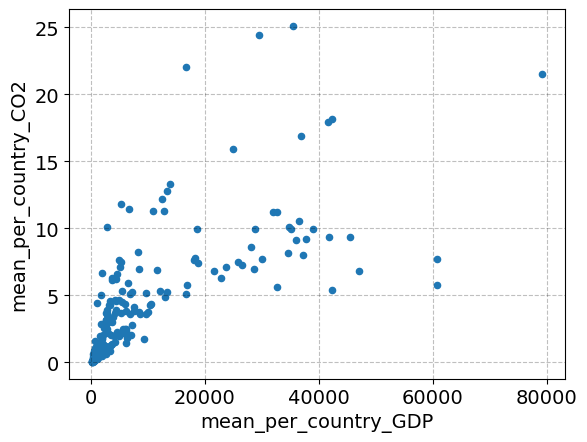

In [23]:
# Plot average emissions per country with average gdp per country 

I = inner4["year"] == 1995
data_mean = inner4[I]
ax = data_mean.plot(x = 'mean_per_country_GDP', y = 'mean_per_country_CO2', kind = 'scatter'); 


Considering the average CO2 and GDP per country through the time period of analysis, we can see that at higher levels of GDP correspond higher levels of CO2 up to around 30000 US$, then we notice an inversion of this relation (excluding some outliers). 

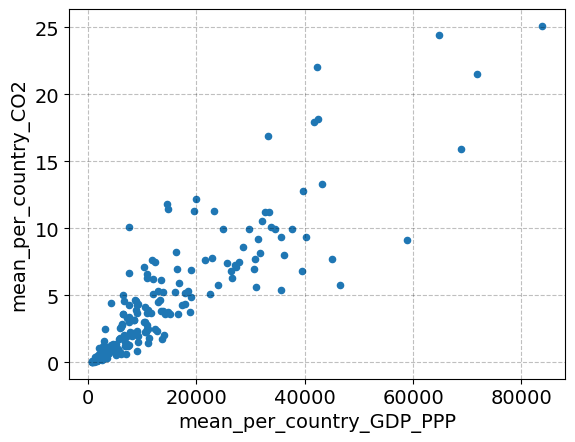

In [24]:
# Calculate mean of GDP_PPP per country and combine it to the dataset inner3

groupbycountryGDP_PPP = inner2.groupby(['country'])['GDP_PPP']
groupbycountryGDP_PPP_mean =  groupbycountryGDP_PPP.mean()
groupbycountryGDP_PPP_mean.name = 'mean_per_country_GDP_PPP'
inner5= inner3.join(groupbycountryGDP_PPP_mean, how='left')

# Plot average emissions per country with average gdp_ppp per country 

F = inner5["year"] == 1995
data_mean_ppp = inner5[F]
ax2 = data_mean_ppp.plot(x = 'mean_per_country_GDP_PPP', y = 'mean_per_country_CO2', kind = 'scatter'); 

With GDP adjusted for Purchasing Power Parity data, the relationship between the two means seems more linear than the case with GDP data, even though after 30000 international $ we notice a inverse relationship for some observations. 

In [25]:
# Define function to plot interactively GDP and CO2 per country

def plot_co2gdp(df, country): 
    I = df['country'] == country
    ax=df.loc[I,:].plot.scatter('GDP', 'CO2', c='year')
    ax.set_xlim(22,80000) # scale graph to make comparison between countries
    ax.set_ylim(0,10)

# Plot GDP and CO2 per country, coloured by year

widgets.interact(plot_co2gdp, 
    df = widgets.fixed(inner2),
    country = widgets.Dropdown(description='country', 
                                    options=inner2.country.unique(), 
                                    value='European Union')
); 


interactive(children=(Dropdown(description='country', index=13, options=('Africa Eastern and Southern', 'Afric…

For East and Pacific asian countries (excluding high income) we see higher level of emissions per capita for higher level of GDP per capita, considering that GDP arrives at around 10000 US$ in 2019. So there is the possibility that they are in the initial part of the EKC. 

For European Union countries, we see an inverse U-shape curve, but the range of its GDP is in fact higher than the previous countries. 

In [26]:
# Define function to plot interactively

def plot_co2gdp(df, country): 
    I = df['country'] == country
    ax=df.loc[I,:].plot.scatter('GDP_PPP', 'CO2', c='year')
    ax.set_xlim(22,80000)
    ax.set_ylim(0,10)

# Plot GDP and CO2 per country, coloured by year

widgets.interact(plot_co2gdp, 
    df = widgets.fixed(inner2),
    country = widgets.Dropdown(description='country', 
                                    options=inner2.country.unique(), 
                                    value='European Union')
); 

interactive(children=(Dropdown(description='country', index=13, options=('Africa Eastern and Southern', 'Afric…

The trends are similar to the previous case with GDP data.

Now we want to analyse specifically our variables for the year 2019. 

In [27]:
# Select observations for 2019
ttnineteen = inner2.loc[inner2['year'] == 2019, :]

# Summary statistics for 2019 
ttnineteen.describe()

,year,GDP,GDP_PPP,CO2
count,230.0,230.000000,230.000000,230.000000
mean,2019.0,13475.513153,20613.477126,4.155925
std,0.0,18388.734444,20660.285567,4.529966
min,2019.0,216.972968,760.453399,0.035704
25%,2019.0,1975.513423,5090.827464,0.800953
50%,2019.0,6140.476798,14311.008452,3.087791
75%,2019.0,15697.674286,29761.402274,5.956737
max,2019.0,112621.821337,120174.754704,32.761775


In [28]:
# Get the country with the highest co2 emissions per capita in 2019

max_co2 = ttnineteen.loc[ttnineteen['CO2'].idxmax()]
max_co2.head()

country           Qatar
year               2019
GDP        62637.275108
GDP_PPP    94674.312143
CO2           32.761775
Name: 5298, dtype: object

In [29]:
# Get the country with the highest gdp per capita in 2019

max_gdp = ttnineteen.loc[ttnineteen['GDP'].idxmax()]
max_gdp.head()


country       Luxembourg
year                2019
GDP        112621.821337
GDP_PPP    120174.754704
CO2            15.306427
Name: 4216, dtype: object

So, in 2019, Qatar is the country with highest CO2 emissions per capita and Luxembourg is the country with highest GDP per capita. 

# Conclusion

We performed some explorations of the dataset that give an overview of the data. We took as examples the European Union, with developed countries, and the developing countries in East and Pacific Asia. Then we plotted data and summary statistics for both GDP per capita and CO2 per capita (and we repeated the same analysis with GDP adjusted for PPP): our general and raw analysis seems to conferm the inverse U-shape curve hypothesized by the EKC.